# Modelo - Pipeline classificação 
- Marketing campaign

In [1]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
import sklearn
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib as m
import warnings

import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark

%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.2.4
seaborn   : 0.11.1
matplotlib: 3.3.4
missingno : 0.4.2
numpy     : 1.20.1
sklearn   : 1.0.2
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
plotly    : 5.6.0



In [5]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (18, 5)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

# Base dados

In [6]:
# Carregando base dados
data = pd.read_csv("marketing_campaign.csv", sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [7]:
# Visualizando os 5 primeiros dados
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
# Visualizando os 5 cinco últimos dados
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [9]:
# Visualizando os infos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Tipos de dados
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
# Visualizando linhas colunas
data.shape

(2240, 29)

In [12]:
# Total de colunas e linhas - data_train

print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 2240
Números de colunas: 29


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   24

Unique values :  
 ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [14]:
# Verificando dados duplicados
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [15]:
# Visualizando dados nulos
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Estatística descritiva

In [16]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [17]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = data.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


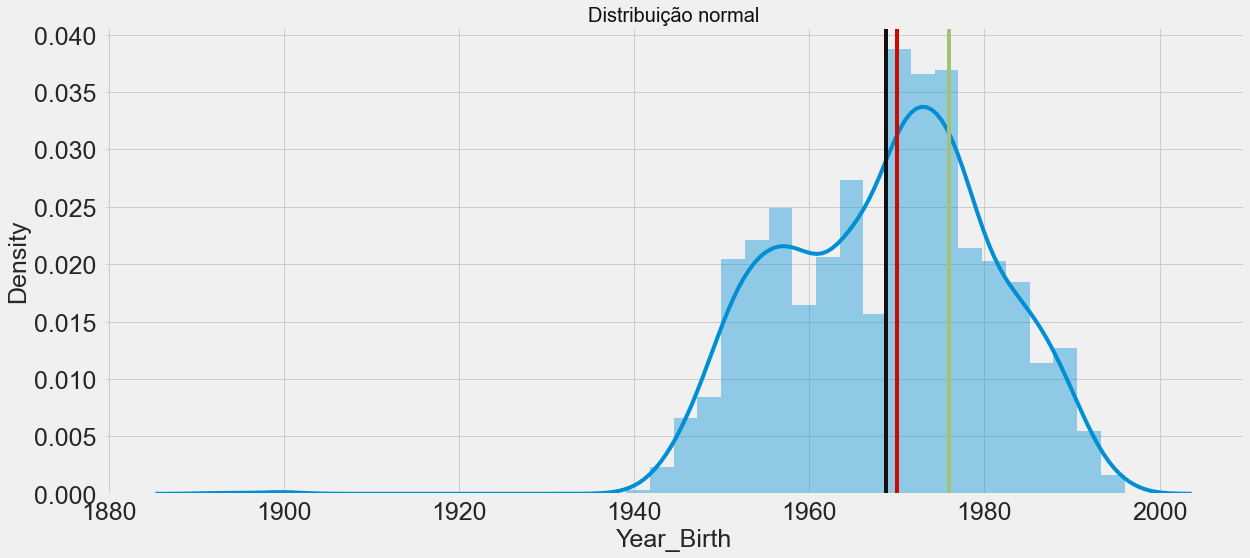

In [18]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(data['Year_Birth']);
plt.title("Distribuição normal", fontsize=20)
plt.axvline(data['Year_Birth'].mean(), color='k')
plt.axvline(data['Year_Birth'].median(), color='r')
plt.axvline(data['Year_Birth'].mode()[0], color='g');

Text(0, 0.5, 'Educação')

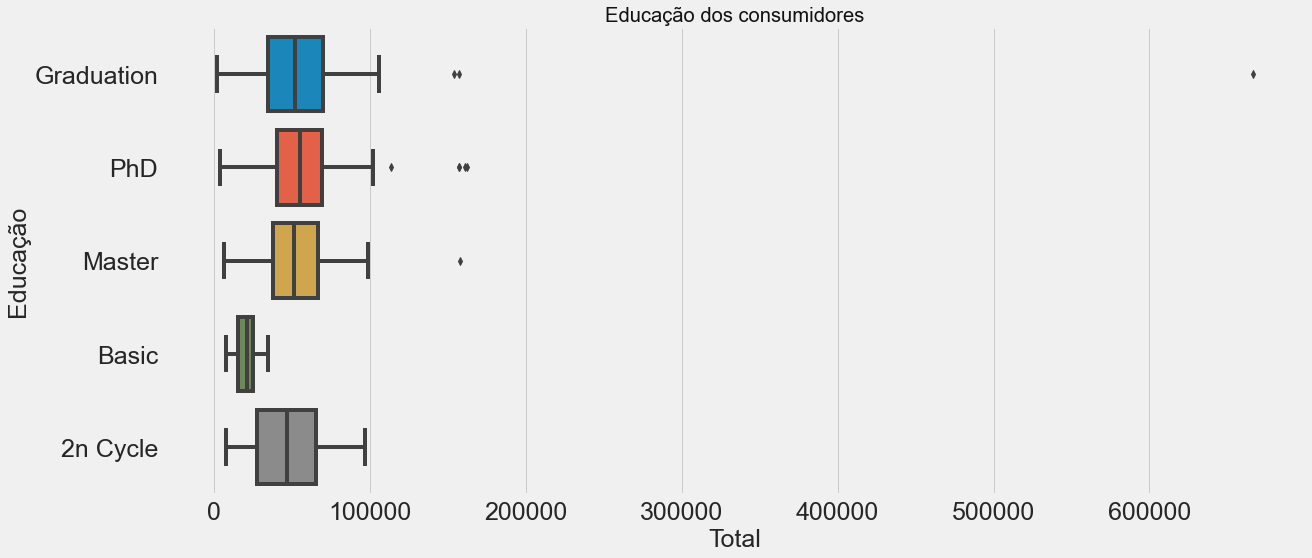

In [19]:
# Verificando os dados no boxplot valor total verificando possíveis outliers
plt.figure(figsize=(18.2, 8))

sns.boxplot(x="Income", y="Education", data = data)
plt.title("Educação dos consumidores")
plt.xlabel("Total")
plt.ylabel("Educação")

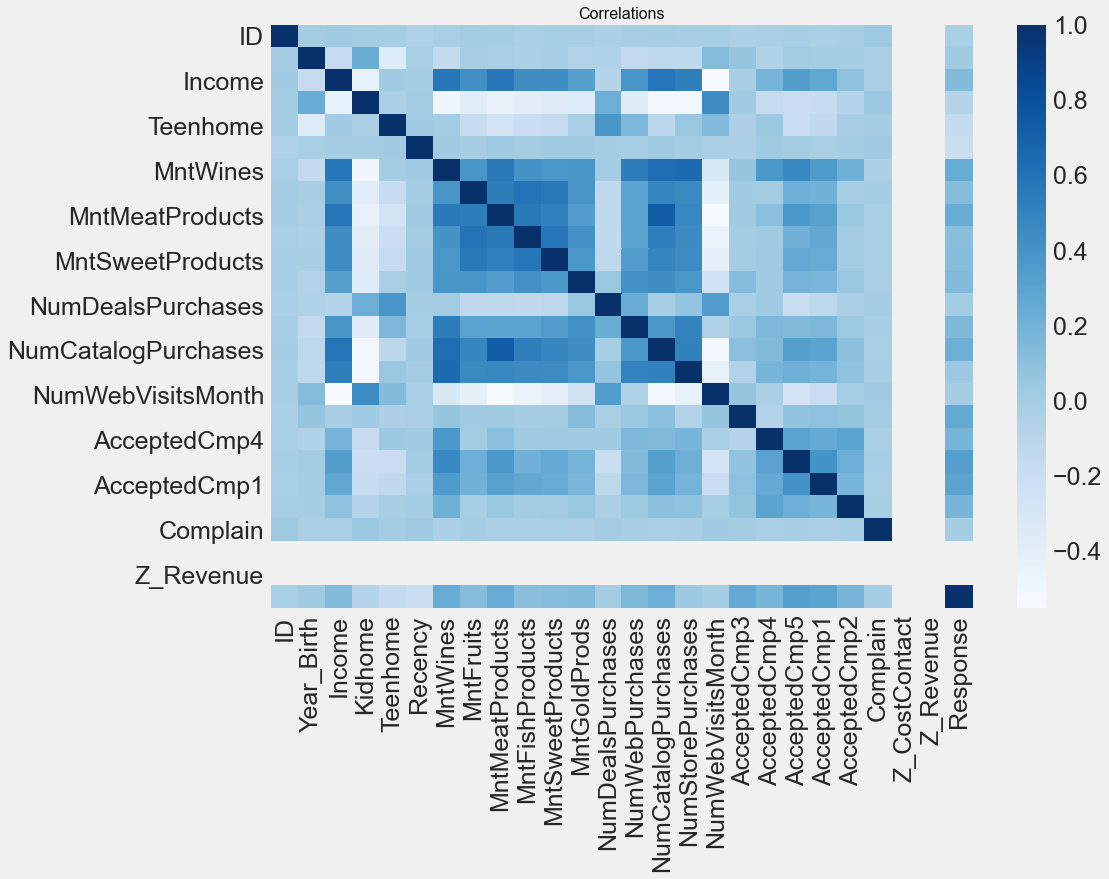

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap="Blues")
plt.title("Correlations", size=16)
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

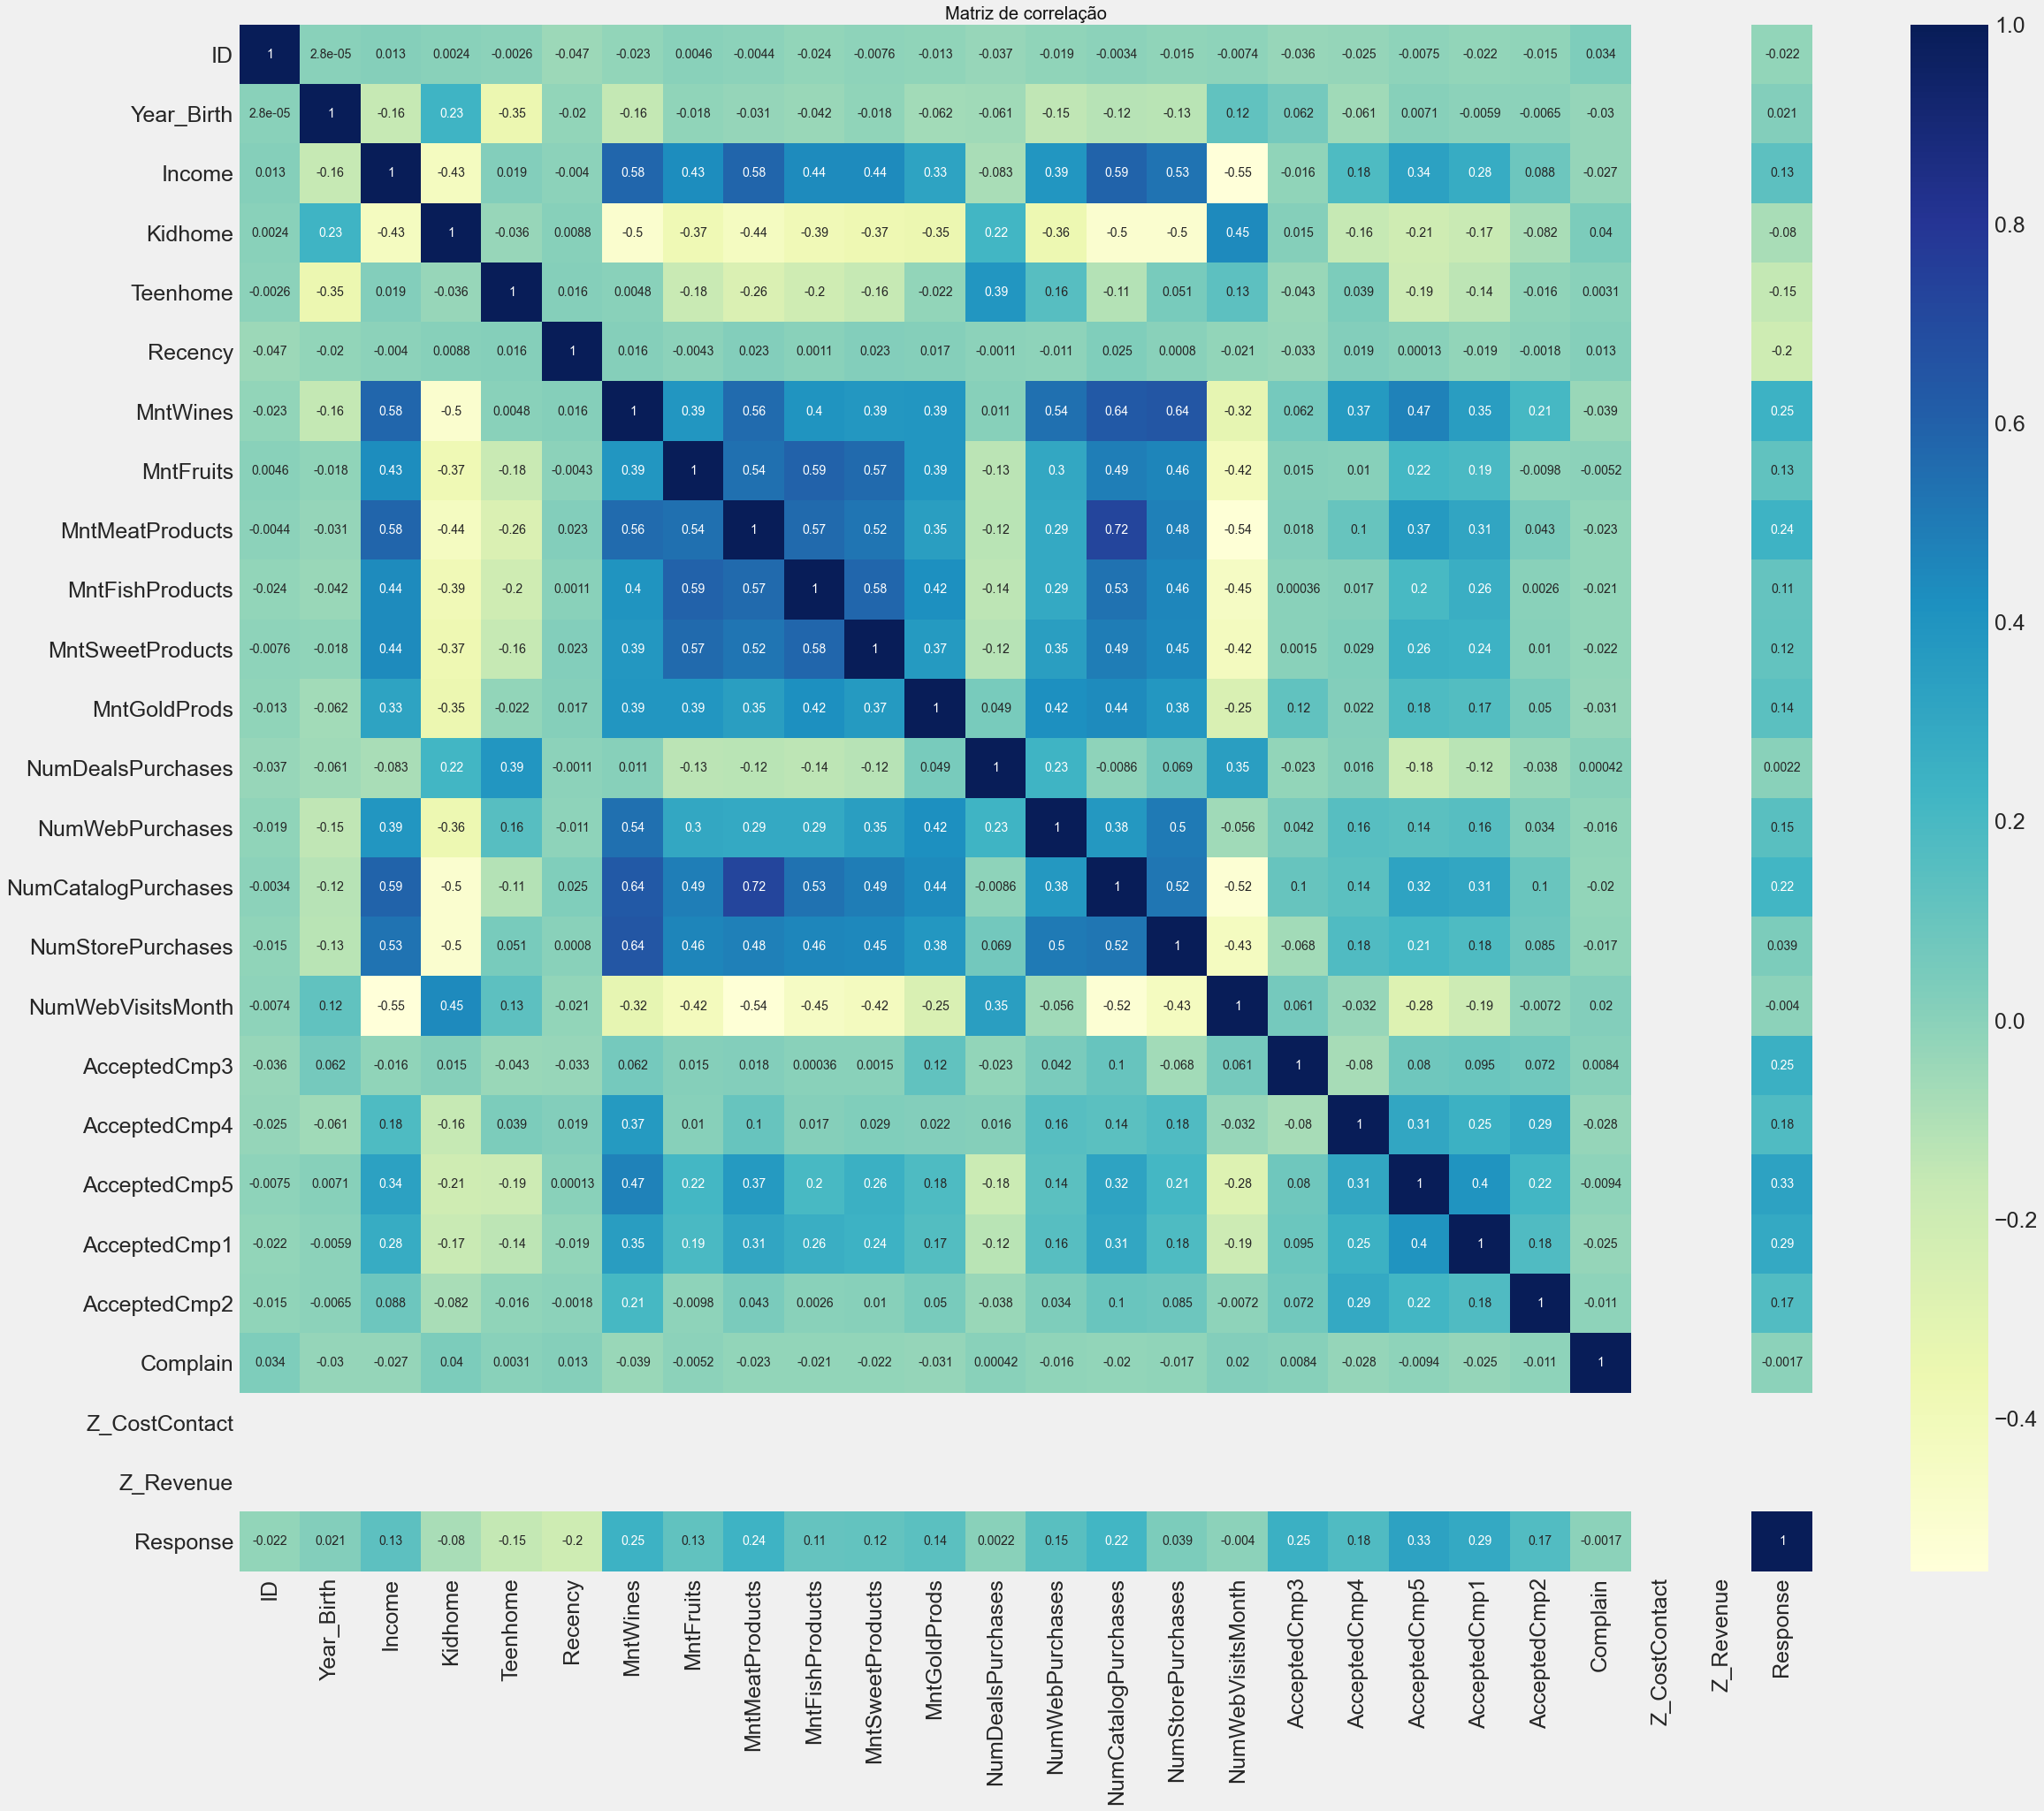

In [21]:
# Gráfico da matriz de correlação

plt.figure(figsize=(35.5,30))
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

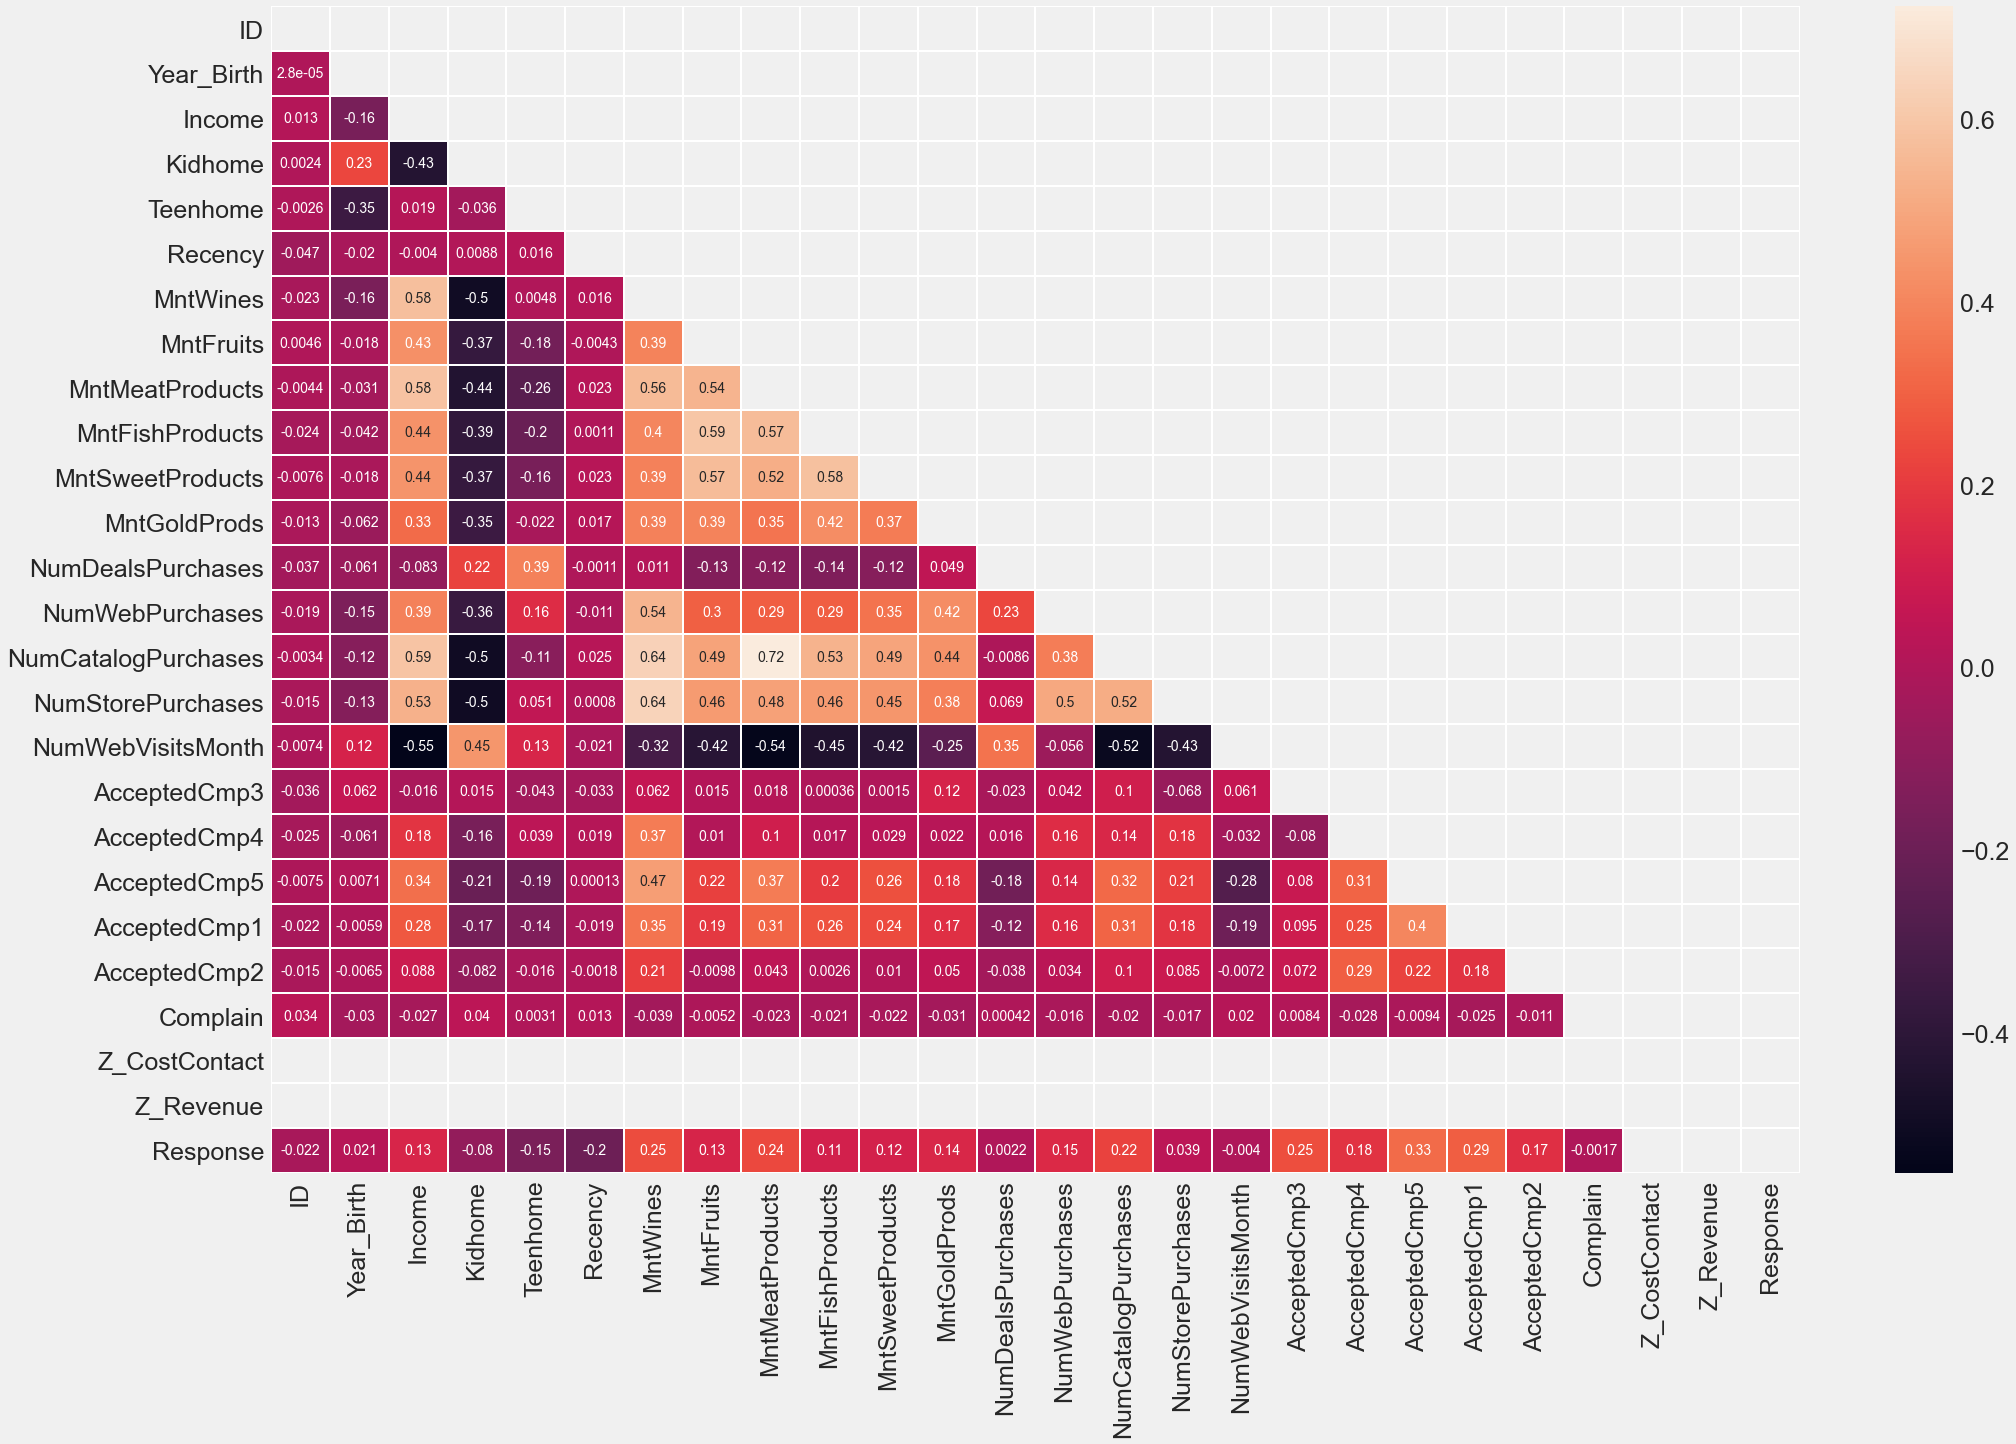

In [22]:
plt.figure(figsize=(30.5,20))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

# Análise dados

Text(0, 0.5, 'Total')

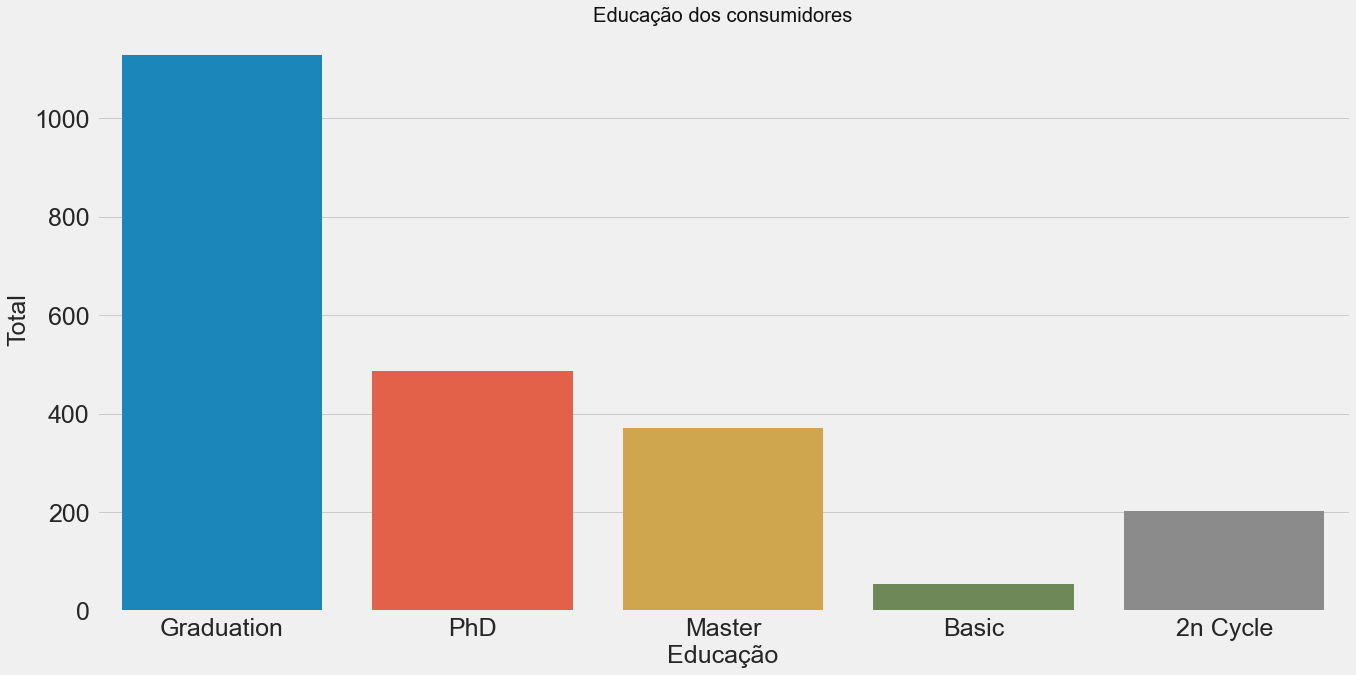

In [23]:
plt.figure(figsize=(20, 10))

plt.title("Educação dos consumidores")
sns.countplot(data["Education"])
plt.xlabel("Educação")
plt.ylabel("Total")

Text(0, 0.5, 'Idades')

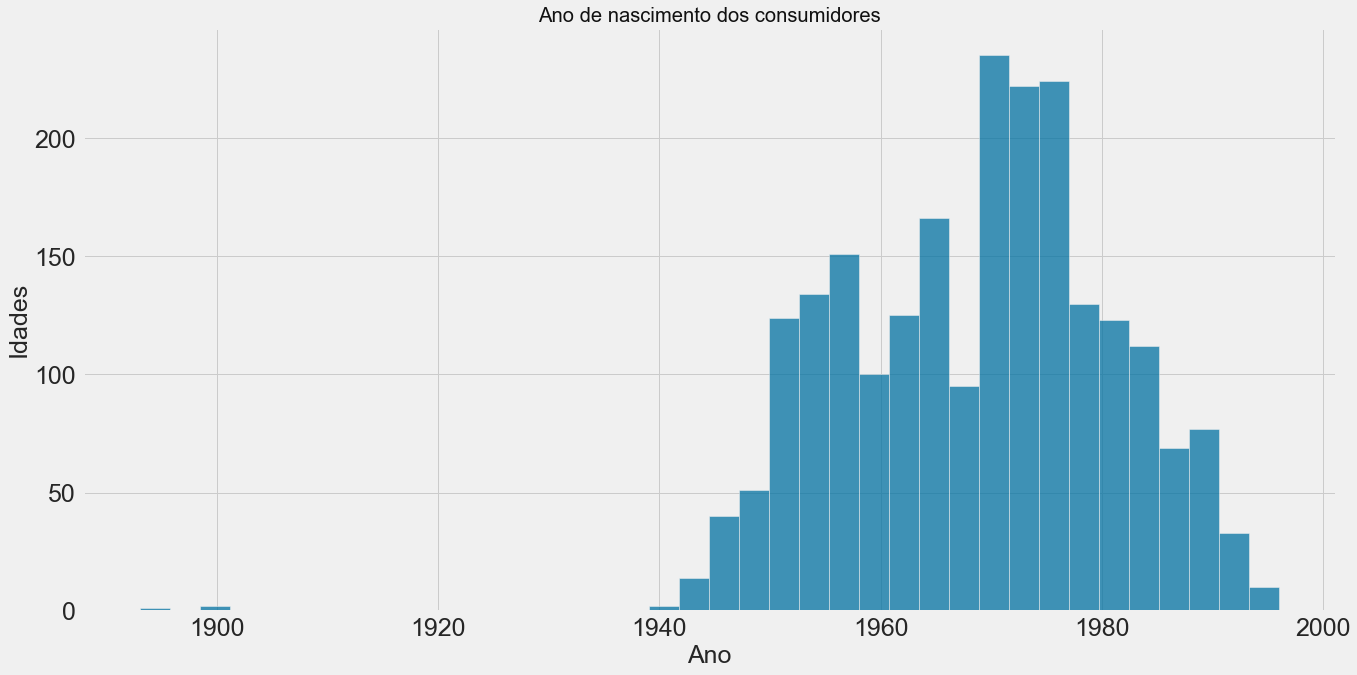

In [24]:
plt.figure(figsize=(20, 10))

sns.histplot(data["Year_Birth"])
plt.title("Ano de nascimento dos consumidores")
plt.xlabel("Ano")
plt.ylabel("Idades")

Text(0, 0.5, 'Total')

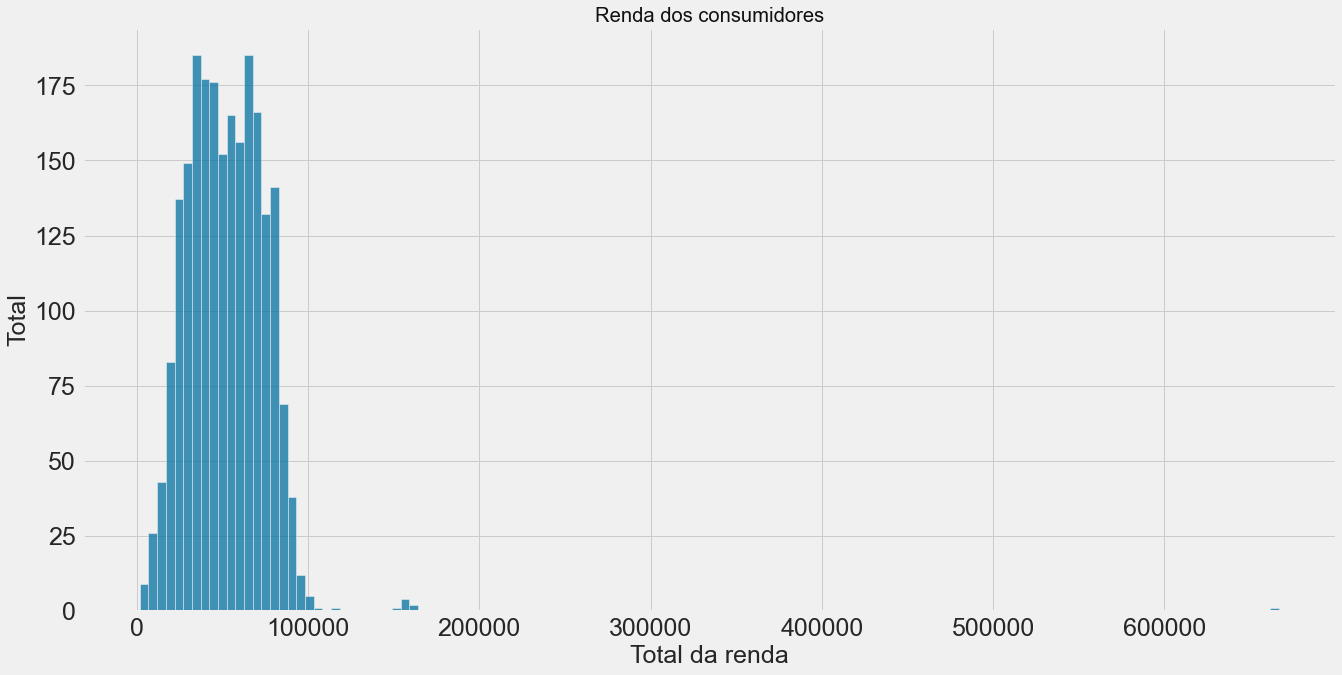

In [25]:
plt.figure(figsize=(20, 10))

sns.histplot(data["Income"])
plt.title("Renda dos consumidores")
plt.xlabel("Total da renda")
plt.ylabel("Total")

Text(0.5, 0, 'Formações')

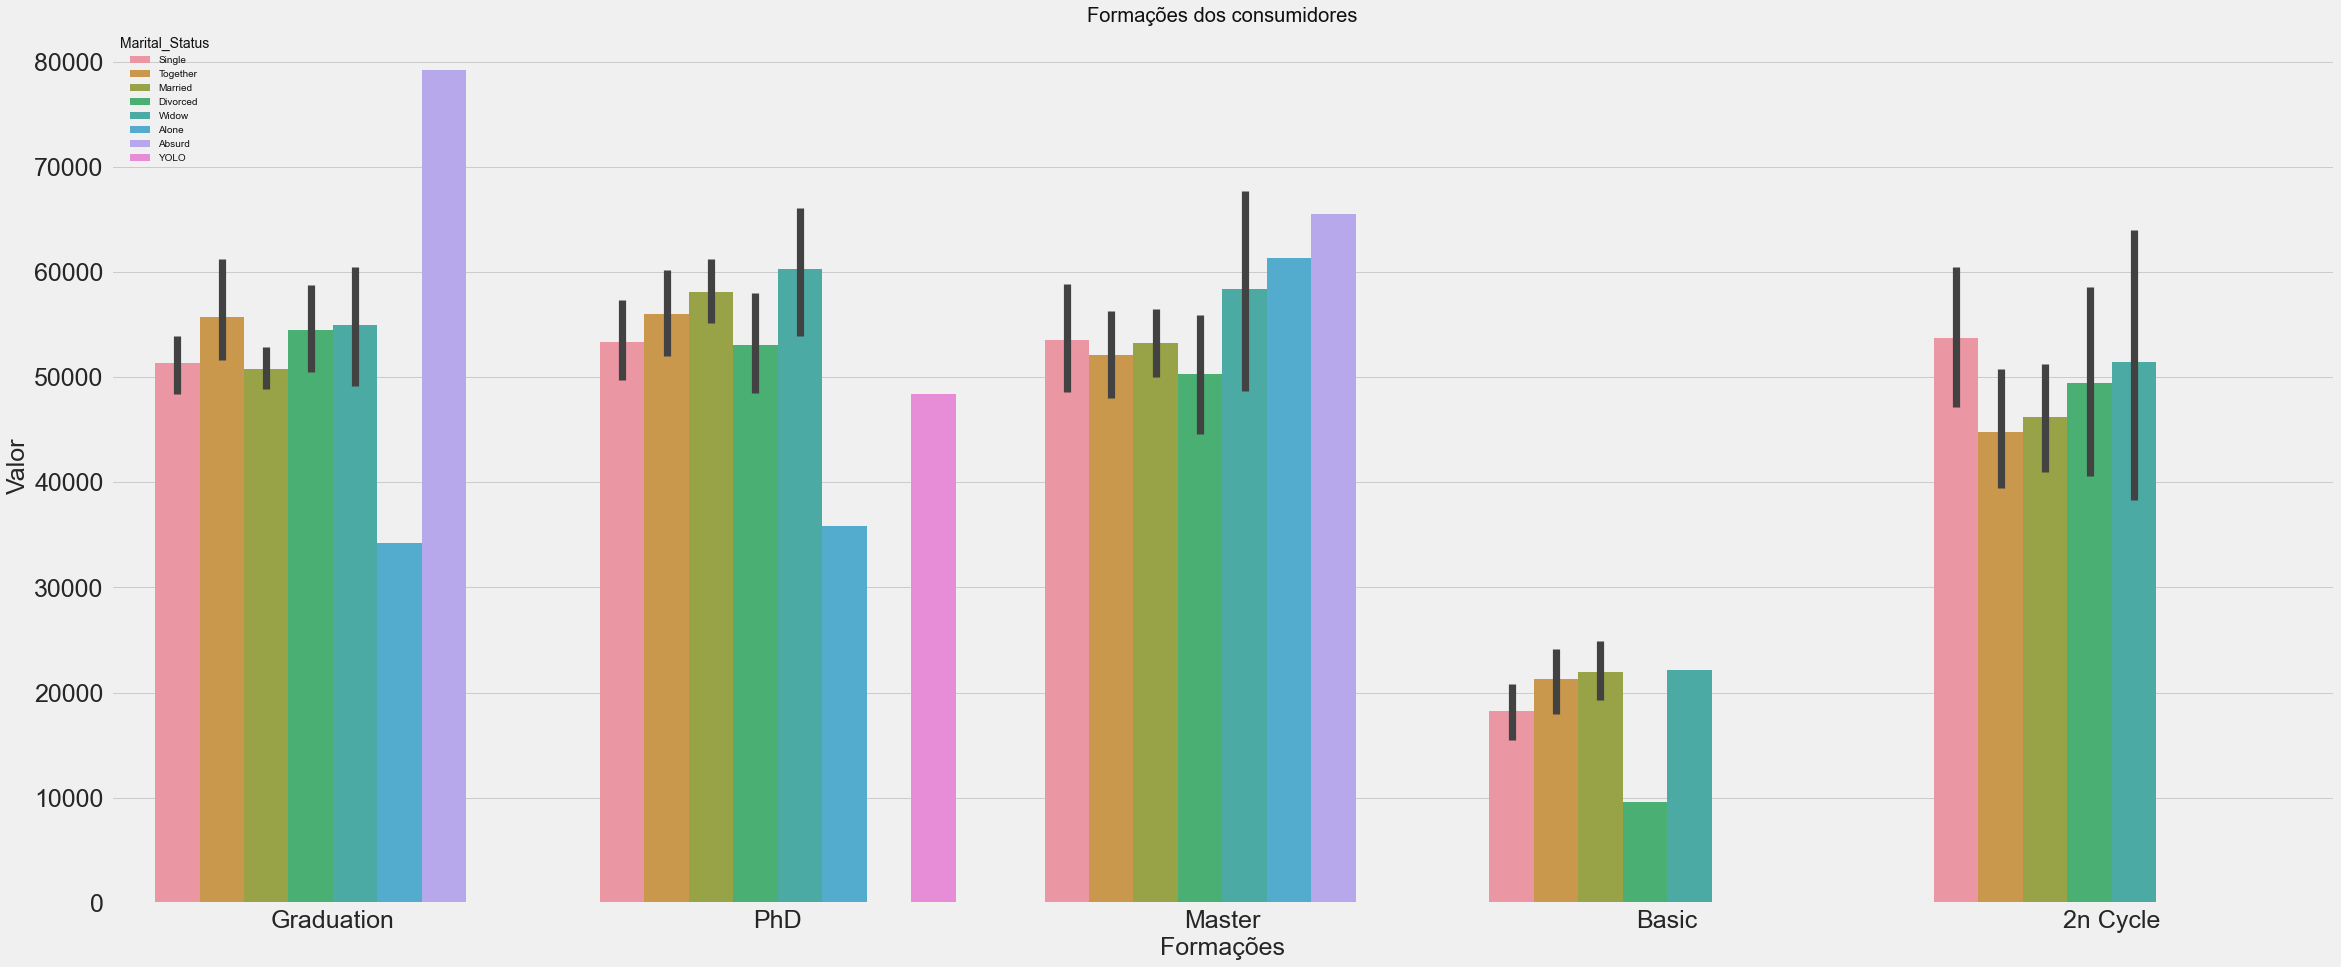

In [26]:
# Gráfico condições de vida por valor do imóvel
plt.figure(figsize=(35.5, 15))

plt.title("Formações dos consumidores")
ax = sns.barplot(x="Education", y="Income", data = data, hue="Marital_Status")
plt.ylabel("Valor")
plt.xlabel("Formações")

Text(0, 0.5, 'Valor')

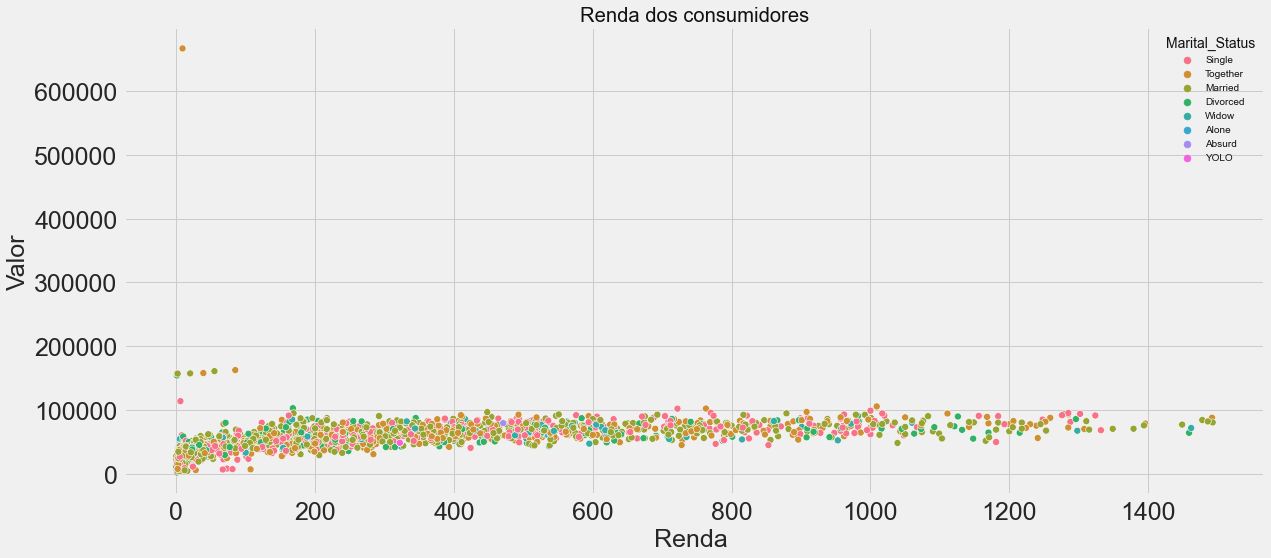

In [27]:
# Região das vendas dos imóveis pela área
plt.figure(figsize=(18.2, 8))

plt.title("Renda dos consumidores")
ax = sns.scatterplot(x="MntWines", y="Income", data = data, hue = "Marital_Status")
plt.xlabel("Renda ")
plt.ylabel("Valor")

Text(0, 0.5, 'Total')

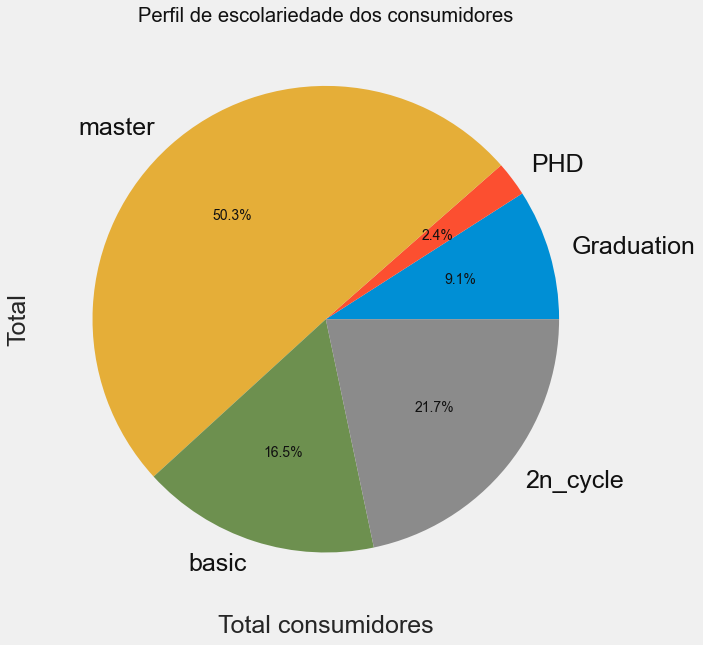

In [28]:
plt.figure(figsize=(20, 10))

# Graduation, PHD, master, basic, 2n cycle

plt.pie(data.groupby("Education")['Education'].count(), labels=["Graduation", "PHD", "master", "basic", "2n_cycle"], autopct = "%1.1f%%");
plt.title("Perfil de escolariedade dos consumidores")
plt.xlabel("Total consumidores")
plt.ylabel("Total")


# Análise de dados = Univariada

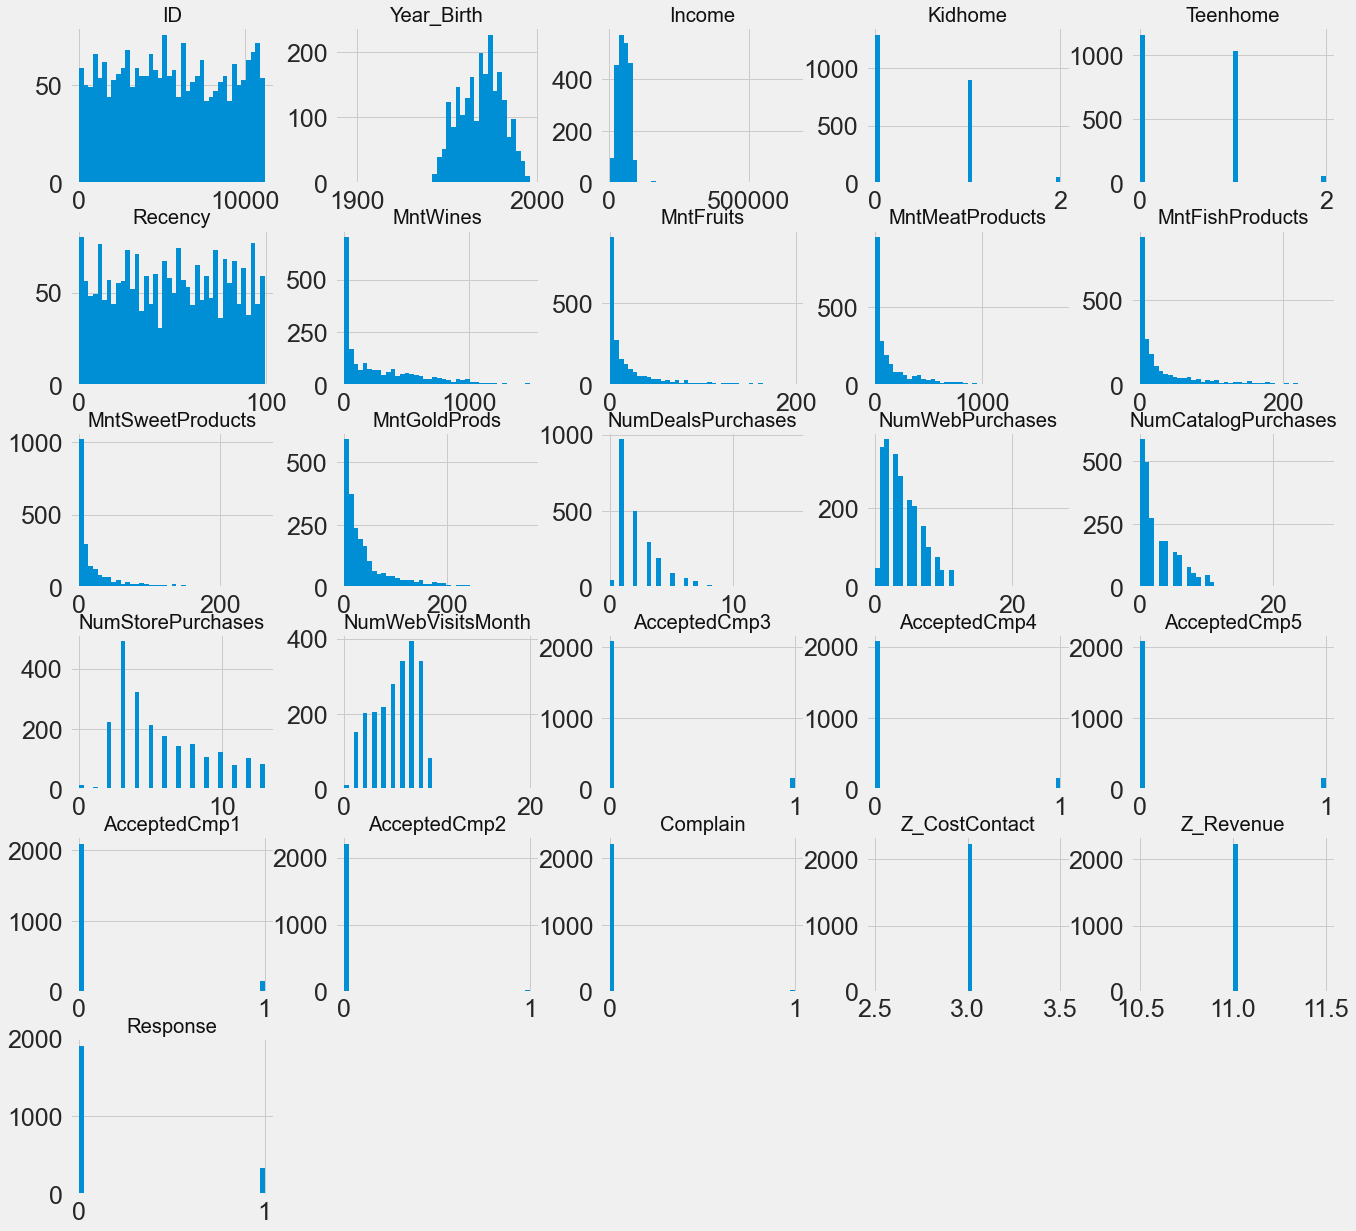

In [29]:
data.hist(bins = 40, figsize=(20.2, 20))
plt.show()

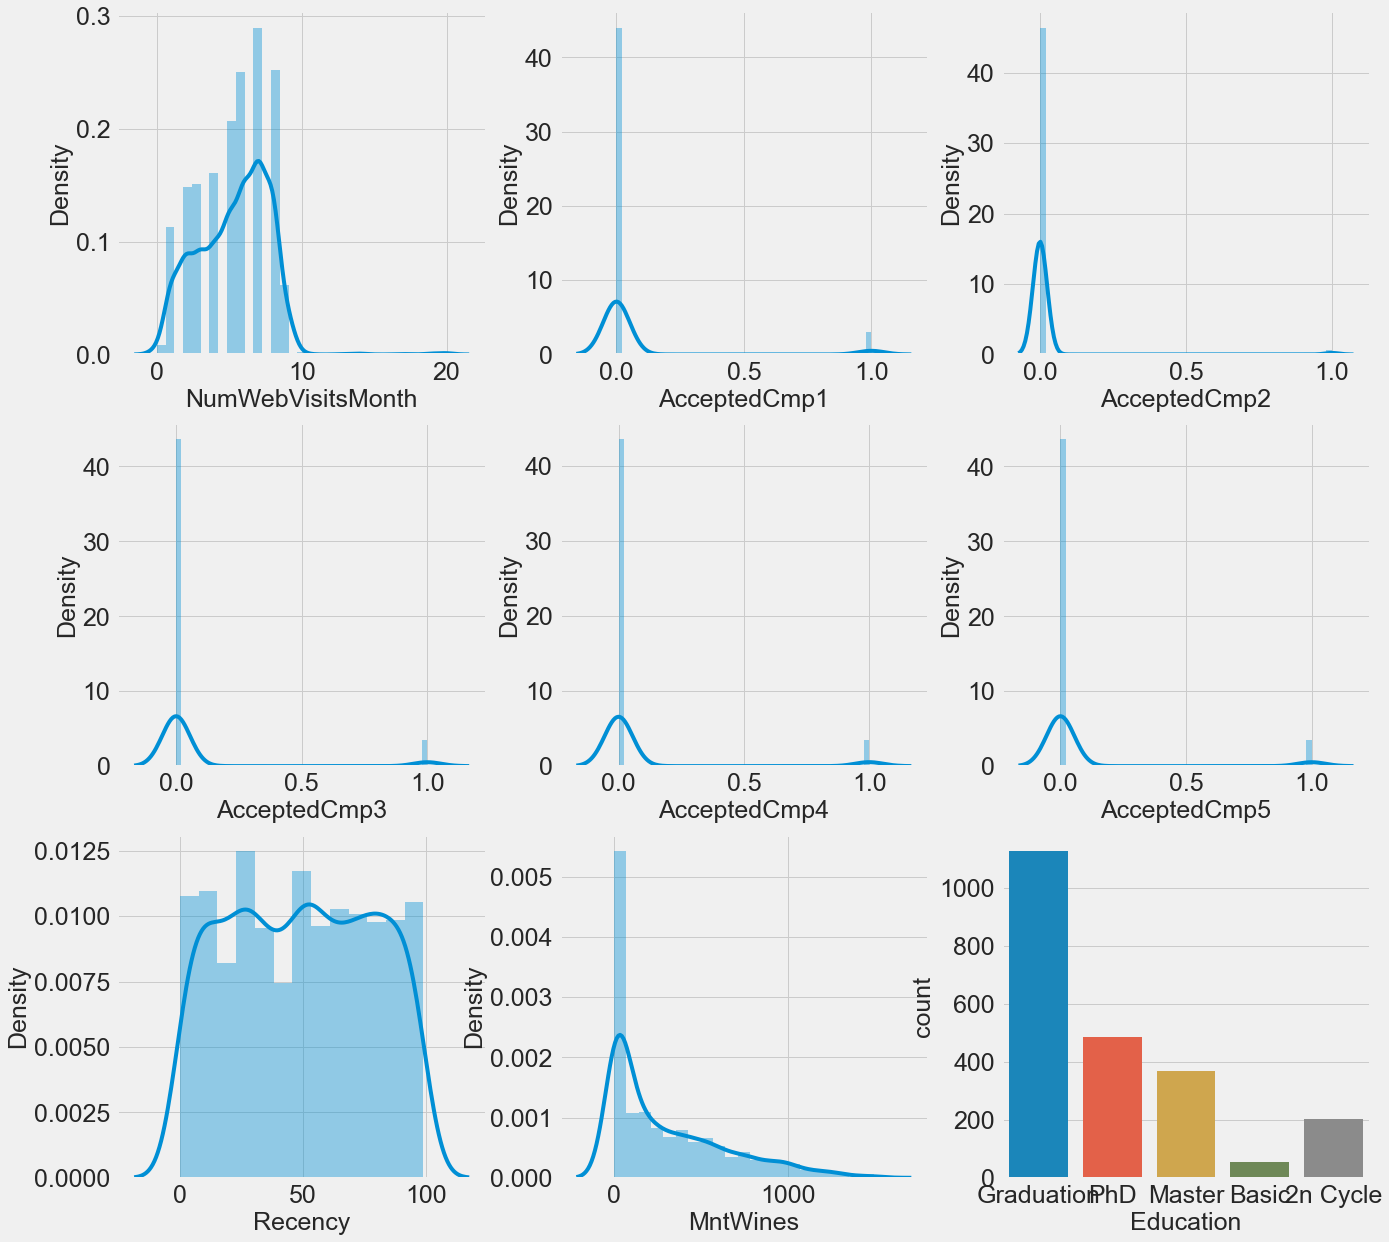

In [30]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(data["NumWebVisitsMonth"] , ax=axes[0, 0] )
sns.distplot(data["AcceptedCmp1"] ,  ax=axes[0, 1])
sns.distplot(data["AcceptedCmp2"] , ax=axes[0, 2])
sns.distplot(data["AcceptedCmp3"], ax=axes[1, 0])
sns.distplot(data["AcceptedCmp4"] , ax=axes[1, 1])
sns.distplot(data["AcceptedCmp5"] , ax=axes[1, 2])
sns.distplot(data["Recency"] , ax=axes[2, 0])
sns.distplot(data["MntWines"], ax=axes[2, 1])
sns.countplot(data["Education"], ax=axes[2, 2])

plt.show()

In [31]:
# Nós imputamos os valores omissos na coluna "Renda" com a mediana dessa coluna em particular

data["Income"].fillna(data["Income"].median(), inplace=True)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Feature Engineering

In [32]:
data["Age"] = 2022 - data["Year_Birth"]

data["Money_Spent"] = (data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"])
data["PurchaseNum"] = data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Marital_Status"] = data["Marital_Status"].replace({"Married": "Together", "Alone": "Single", "Absurd": "Single", "Divorced": "Single", "Widow": "Single", "Divorced": "Single", "YOLO": "Single"})

# exluindo coluna
data.drop(["Education", "Marital_Status", "Dt_Customer"], axis=1, inplace=True)
data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Money_Spent,PurchaseNum,Children
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,1617,22,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,27,4,2
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,776,20,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,53,6,1
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55,1341,16,1
2236,4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76,444,15,3
2237,7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41,1241,18,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66,843,21,1


# Treino e Teste

- Treino e teste da base de dados da coluna price e idade

In [47]:
x = data.drop('Response',axis=1).values
y = data['Response'].values

In [48]:
# Total de linhas e colunas dados variável x
x.shape

(2240, 29)

In [49]:
# Total de linhas e colunas dados variável y
y.shape

(2240,)

# Escalonamento

- Escalonamento uma forma de contornar os problemas relacionados à escala, mantendo a informação estatística dos dados. O procedimento consiste em realizar uma transformação sobre o conjunto original dos dados de modo que cada variável apresente média zero e variância unitária.

In [50]:
# Escalonamento dos dados

# Importando biblioteca a biblioteca
from sklearn.preprocessing import StandardScaler

# Criando o escalonamento
model_scaler = StandardScaler()

# Treinamneto do escalonamento
model_scaler_fit = model_scaler.fit_transform(x)

# Visualizando linhas e colunas do escalonamento
model_scaler_fit.shape

(2240, 29)

In [51]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, # Variável x
                                                    y, # Variável y
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [42]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(1792, 2)

In [43]:
# Total de linhas dos dados de treino y
y_train.shape

(1792,)

In [44]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(448, 2)

In [45]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(448,)

# Model pipeline

In [52]:
# Modelo pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

data_pipeline = Pipeline([
    ("scaler", StandardScaler()), # Scaler : Para pré-processamento de dados, ou seja, transforme os dados em média zero e variância de unidade usando o StandardScaler ().
    ("selector", VarianceThreshold()), # Seletor de recurso : Use VarianceThreshold () para descartar recursos cuja variação seja menor que um determinado limite definido.
    ("classifier", KNeighborsClassifier()) # Classificador : KNeighborsClassifier (), que implementa o classificador de k-vizinho mais próximo e seleciona a classe dos k pontos principais, que estão mais próximos do exemplo de teste.
])

data_pipeline_fit = data_pipeline.fit(x_train, y_train)
data_pipeline_score = data_pipeline.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.8973214285714286
Treinamento base teste - Pipeline: 0.8549107142857143


In [54]:
# Previsão do pipeline do modelo
data_pipeline_pred_1 = data_pipeline.predict(x_test)

(<Figure size 1296x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

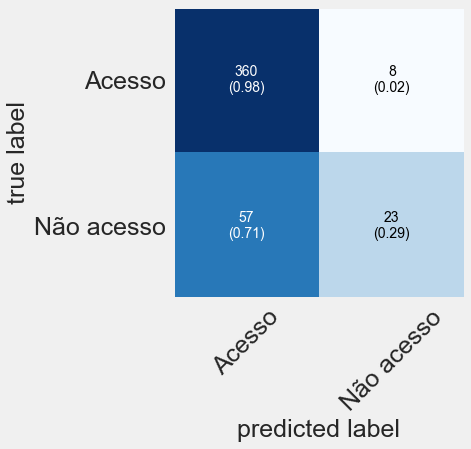

In [55]:
# Matrix confusion ou Matriz de Confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matrix_1 = confusion_matrix(y_test, data_pipeline_pred_1)
plot_confusion_matrix(matrix_1, show_normed=True, colorbar=False, class_names=['Acesso', 'Não acesso']) 

In [56]:
# Accuracy do pipeline
from sklearn.metrics import accuracy_score

accuracy_pipeline_1 = accuracy_score(y_test, data_pipeline_pred_1)
print("Accuracy KNN - Pipeline: %.2f" % (accuracy_pipeline_1 * 100))

Accuracy KNN - Pipeline: 85.49


roc_auc 0.7716881793478262


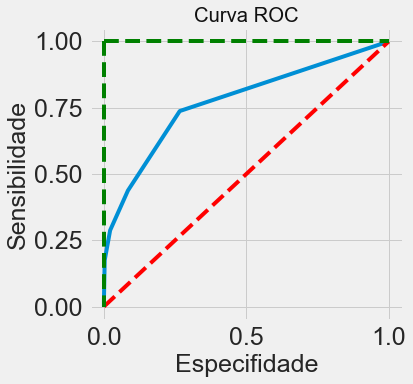

In [57]:
# Curva ROC do modelo
from sklearn.metrics import roc_curve, roc_auc_score

roc = data_pipeline.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [58]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(y_test, data_pipeline_pred_1)
print("Modelo - Pipeline 1")
print()
print(classification)

Modelo - Pipeline 1

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       368
           1       0.74      0.29      0.41        80

    accuracy                           0.85       448
   macro avg       0.80      0.63      0.67       448
weighted avg       0.84      0.85      0.83       448



In [59]:
# Métricas do modelo 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, data_pipeline_pred_1)
Recall = recall_score(y_test, data_pipeline_pred_1)
Accuracy = accuracy_score(y_test, data_pipeline_pred_1)
F1_Score = f1_score(y_test, data_pipeline_pred_1)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.854911
0,precision,0.741935
3,F1_Score,0.414414
1,Recall,0.287500


# Pipeline 2
**Pipeline 2 - Decision Tree Classifier**

In [60]:
# Pipeline decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

data_pipeline_2 = Pipeline([
    ("scaler", StandardScaler()), # Scaler : Para pré-processamento de dados, ou seja, transforme os dados em média zero e variância de unidade usando o StandardScaler ().
    ("selector", VarianceThreshold()), # Seletor de recurso : Use VarianceThreshold () para descartar recursos cuja variação seja menor que um determinado limite definido.
    ("classifier", DecisionTreeClassifier(max_depth=4, random_state=0)) # Classificador : DecisionTreeClassifier (), que implementa o classificador de árvore decisão Árvores de decisão são métodos de classificação que podem extrair regras simples sobre os recursos de dados que são inferidos do conjunto de dados de entrada
])

data_pipeline2_fit = data_pipeline_2.fit(x_train, y_train)
data_pipeline2_score = data_pipeline_2.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline_2.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline_2.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.8939732142857143
Treinamento base teste - Pipeline: 0.8482142857142857


In [61]:
# Previsão do pipeline 
data_pipeline_pred_2 = data_pipeline_2.predict(x_test)
data_pipeline_pred_2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [62]:
# Accuracy do pipeline
accuracy_pipeline_2 = accuracy_score(y_test, data_pipeline_pred_2)
print("Accuracy Pipeline 2: %.2f" % (accuracy_pipeline_2 * 100))

Accuracy Pipeline 2: 84.82


(<Figure size 1296x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

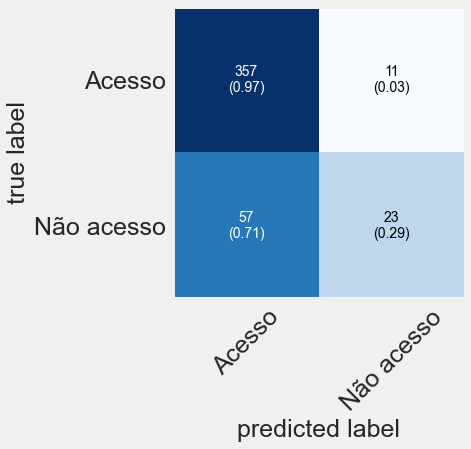

In [63]:
# A matrix confusion do modelo
matrix_confusion_1 = confusion_matrix(y_test, data_pipeline_pred_2)
plot_confusion_matrix(matrix_confusion_1, show_normed=True, colorbar=False, class_names=['Acesso', 'Não acesso'])

roc_auc 0.7831351902173913


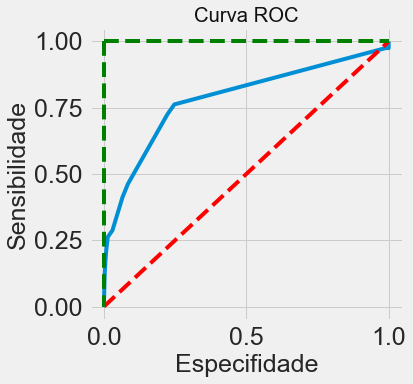

In [64]:
# Curva ROC do modelo
roc = data_pipeline_2.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [65]:
# Classification_report
classification = classification_report(y_test, data_pipeline_pred_2)
print("Modelo Pipeline 2")
print()
print(classification)

Modelo Pipeline 2

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       368
           1       0.68      0.29      0.40        80

    accuracy                           0.85       448
   macro avg       0.77      0.63      0.66       448
weighted avg       0.83      0.85      0.82       448



In [67]:
# Méricas do modelo
precision = precision_score(y_test, data_pipeline_pred_2)
Recall = recall_score(y_test, data_pipeline_pred_2)
Accuracy = accuracy_score(y_test, data_pipeline_pred_2)
F1_Score = f1_score(y_test, data_pipeline_pred_2)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.848214
0,precision,0.676471
3,F1_Score,0.403509
1,Recall,0.287500


**Pipeline 3 - Naive bayes**

In [68]:
# Modelo naive bayes

# Importando biblioteca ML naive bayes
from sklearn.naive_bayes import GaussianNB

# Pipeline Naive bayes
data_pipeline_3 = Pipeline([
    ("scaler", StandardScaler()), 
    ("selector", VarianceThreshold()), 
    ("classifier", GaussianNB())])

data_pipeline3_fit = data_pipeline_3.fit(x_train, y_train)
data_pipeline3_score = data_pipeline_3.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline_3.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline_3.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.8231026785714286
Treinamento base teste - Pipeline: 0.8191964285714286


In [69]:
# Previsão do modelo - Naive bayes

# Previsão do pipeline
data_pipeline_pred_3 = data_pipeline_3.predict(x_test)
data_pipeline_pred_3

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [70]:
# Accuracy do pipeline
accuracy_pipeline_3 = accuracy_score(y_test, data_pipeline_pred_3)
print("Accuracy pipeline 3: %.2f" % (accuracy_pipeline_3 * 100))

Accuracy pipeline 3: 81.92


(<Figure size 1296x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

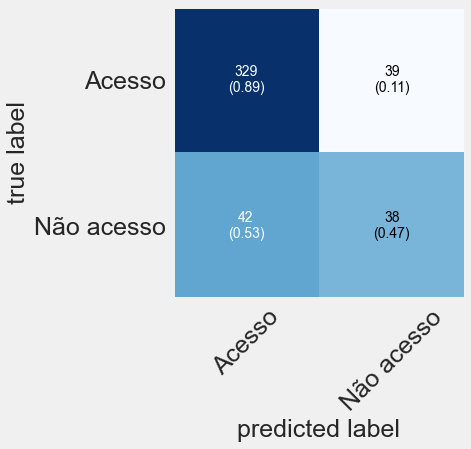

In [71]:
# A matrix confusion pipeline
matrix_confusion_4 = confusion_matrix(y_test, data_pipeline_pred_3)
plot_confusion_matrix(matrix_confusion_4, show_normed=True, colorbar=False, class_names=['Acesso', 'Não acesso'])

roc_auc 0.8156589673913043


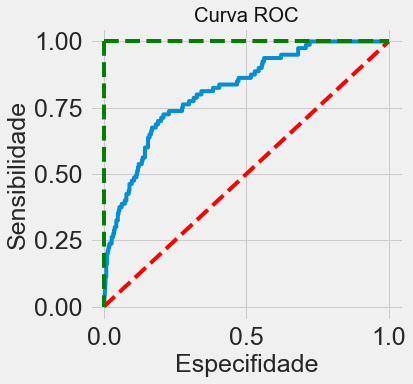

In [72]:
# Curva ROC do pipeline
roc = data_pipeline_3.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [73]:
# Classification report do modelo
class_report = classification_report(y_test, data_pipeline_pred_3)
print("Modelo 03 - Pipeline")
print("\n")
print(class_report)

Modelo 03 - Pipeline


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       368
           1       0.49      0.47      0.48        80

    accuracy                           0.82       448
   macro avg       0.69      0.68      0.69       448
weighted avg       0.82      0.82      0.82       448



In [74]:
# Metricas do pipeline
precision = precision_score(y_test, data_pipeline_pred_3)
Recall = recall_score(y_test, data_pipeline_pred_3)
Accuracy = accuracy_score(y_test, data_pipeline_pred_3)
F1_Score = f1_score(y_test, data_pipeline_pred_3)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.819196
0,precision,0.493506
3,F1_Score,0.484076
1,Recall,0.475000


In [75]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Pipeline 1: K-NN", 
               "Pipeline 2: Decision tree", 
               "Pipeline 3: Naive bayes"],

    "Acurácia" :[accuracy_pipeline_1, 
                      accuracy_pipeline_2, 
                      accuracy_pipeline_3]})

modelos_2 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_2.to_csv("modelos_2.csv")
modelos_2

,Models,Acurácia
0,Pipeline 1: K-NN,0.854911
1,Pipeline 2: Decision tree,0.848214
2,Pipeline 3: Naive bayes,0.819196


In [76]:
# Salvando pipeline Machine learning

import pickle    
    
with open('data_pipeline_pred_1.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_1, file)
    
with open('data_pipeline_pred_2.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_2, file)
    
with open('data_pipeline_pred_3.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_3, file)